## North and South Perth Housing Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import hvplot.pandas
import requests

from config import geoapify_key 

# Analysing Price Trends between South and North of Perth 

In [2]:
# Read Postcode CSV (delete if using API)
clean_postcodes = pd.read_csv('clean_postcodes.csv')
clean_postcodes.head() 

POSTCODE        LONG        LAT
0      6000  115.859912 -31.948762
1      6001  115.763228 -31.992120
2      6003  115.869136 -31.939272
3      6004  115.874601 -31.956931
4      6005  115.836896 -31.957070

In [3]:
# Read clean perth housing data
perth_housing_data = pd.read_csv('clean_perth_data.csv')
perth_housing_data.head()

SUBURB   PRICE  BEDROOMS  BATHROOMS  LAND_AREA  BUILD_YEAR  CBD_DIST  \
0  South Lake  565000         4          2        600        2003     18300   
1       Wandi  365000         3          2        351        2013     26900   
2     Camillo  287000         3          1        719        1979     22600   
3    Bellevue  255000         2          1        651        1953     17900   
4   Lockridge  325000         4          1        466        1998     11200   

                NEAREST_STN  NEAREST_STN_DIST   DATE_SOLD  POSTCODE  \
0  Cockburn Central Station              1800  2018-09-01      6164   
1           Kwinana Station              4900  2019-02-01      6167   
2           Challis Station              1900  2015-06-01      6111   
3           Midland Station              3600  2018-07-01      6056   
4        Bassendean Station              2000  2016-11-01      6054   

    LATITUDE   LONGITUDE                   NEAREST_SCH  NEAREST_SCH_DIST  
0 -32.115900  115.842450   LAKELAND SENIOR HIGH SCHOOL               828  
1 -32.193470  115.859554                ATWELL COLLEGE              5524  
2 -32.120578  115.993579  KELMSCOTT SENIOR HIGH SCHOOL              1649  
3 -31.900547  116.038009  SWAN VIEW SENIOR HIGH SCHOOL              1571  
4 -31.885790  115.947780                 KIARA COLLEGE              1514

In [4]:
# Format DATE_SOLD to datetime. 
perth_housing_data['DATE_SOLD'] = pd.to_datetime(perth_housing_data['DATE_SOLD'])

In [5]:
# Find the highest prices by postcode. 
max_price_postcode = pd.DataFrame(perth_housing_data.groupby(['SUBURB','POSTCODE'])['PRICE'].max())
sorted_prices = pd.DataFrame(max_price_postcode['PRICE'].sort_values(ascending=False))

In [6]:
# Top 10 Postcodes by Highest Prices
sorted_prices['PRICE'] = pd.to_numeric(sorted_prices['PRICE'])
sorted_prices['PRICE'] = sorted_prices['PRICE'].map('{:,.0f}'.format)

In [7]:
# Top 10 - Most expensive house in the top 10 postcodes
sorted_prices.head(10)

PRICE
SUBURB           POSTCODE           
Floreat          6014      2,440,000
City Beach       6015      2,437,000
Dalkeith         6009      2,430,000
Watermans Bay    6020      2,425,000
Peppermint Grove 6011      2,425,000
Mosman Park      6012      2,425,000
Hazelmere        6055      2,420,000
Applecross       6153      2,410,000
Swanbourne       6010      2,400,000
North Fremantle  6159      2,400,000

In [8]:
#Bottom 10 - Most expensive house in the bottom 10 postcodes 
sorted_prices.tail(10)

PRICE
SUBURB              POSTCODE         
Merriwa             6030      455,000
Gosnells            6110      453,000
Stratton            6056      450,000
Parmelia            6167      448,000
Brookdale           6112      445,000
Camillo             6111      442,000
Medina              6167      430,000
Koongamia           6056      425,000
Kwinana Town Centre 6167      330,000
Kwinana Beach       6167      170,000

In [9]:
# Find the top 5 postcodes by average prices. 
average_prices = pd.DataFrame(perth_housing_data.groupby(['SUBURB', 'POSTCODE'])['PRICE'].mean().round(0))
average_prices = pd.DataFrame(average_prices['PRICE'].sort_values(ascending=False))
average_prices = average_prices.rename(columns={'PRICE':"AVERAGE_PRICE"})

In [10]:
# Reset so POSTCODE is not Index 
average_prices = average_prices.reset_index(level='POSTCODE')                                                               

In [11]:
# Reset so SUBURB is not Index 
average_prices = average_prices.reset_index(level='SUBURB')    

In [12]:
average_prices.head(10)

SUBURB  POSTCODE  AVERAGE_PRICE
0          Dalkeith      6009      1961922.0
1  Peppermint Grove      6011      1771982.0
2         Cottesloe      6011      1646283.0
3        City Beach      6015      1644756.0
4          Nedlands      6009      1639099.0
5        Swanbourne      6010      1590743.0
6           Floreat      6014      1474613.0
7        Naval Base      6165      1408000.0
8        Applecross      6153      1396130.0
9       Mosman Park      6012      1383912.0

In [13]:
# Check how many postcodes are SOR in the top 10 average house prices 
south_count_top_10 = (average_prices.head(10)['POSTCODE'] >= 6100).value_counts()
print(south_count_top_10)

POSTCODE
False    8
True     2
Name: count, dtype: int64


In [14]:
# Check how many postcodes are SOR in the top 10 average house prices 
south_count_bottom_10 = (average_prices.tail(10)['POSTCODE'] >= 6100).value_counts()
print(south_count_bottom_10)

POSTCODE
True     9
False    1
Name: count, dtype: int64


In [15]:
# average_prices = average_prices.drop_duplicates(subset='POSTCODE')

In [16]:
# average_prices["LONG"] = ""
# average_prices["LAT"] = ""

In [17]:
# # Print a message to follow up the airport search
# print("Starting Long and Lat search")

# # Create a base URL 
# url = "https://api.geoapify.com/v1/geocode/search?"
# base_url = f'https://api.geoapify.com/v1/geocode/search?text={postcode}&lang=en&limit=10&type=postcode&filter=countrycode:au&apiKey={api_key}'
    
# # Loop through the DataFrame and search coordinates for the suburb 
# for index, row in average_prices.iterrows():

#     # Variables for postcode and suburb
#     postcode = row["POSTCODE"]
#     suburb = row["SUBURB"]
#     state = "Western Australia"

#     params =  { "text" : f"{suburb},{postcode},{state}",
#                "countrycode" : "au",
#                "type": "postcode",
#                "apiKey" : geoapify_key }
#     # Make the API request
#     response = requests.get(url=url, params=params)
    
#     # Convert reponse to JSON
#     response = response.json()
    
#     # Extract latitude and longitude
#     try:
#         average_prices.loc[index, "LONG"] = response['features'][0]['properties']['lon']
#         average_prices.loc[index, "LAT"] = response['features'][0]['properties']['lat']
#         print(f"Coordinates for postcode {postcode} (longitude: {average_prices.loc[index, 'LONG']}, latitude: {average_prices.loc[index, 'LAT']})")
#     except IndexError as e:
#         print(f"{e.args[0]} not longitude or latitude found for postcode {postcode}")
              
#     # Log the search results
#     # print(f"Coordinates for {postcode} fetched...long {average_prices.loc[index, 'LONG']} and lat {average_prices.loc[index,"LAT"]}")
    
# print("Coordinates fetching finished")
# # Display sample data to confirm that the coordinates appear
# average_prices.head()

In [18]:
# average_prices['LONG'] = pd.to_numeric(average_prices['LONG'], errors='coerce')
# average_prices['LAT'] = pd.to_numeric(average_prices['LAT'], errors='coerce')

In [19]:
# average_prices.dropna(axis=0, how='any', inplace=True)

In [20]:
# average_prices.head(50)

In [21]:
# # Drop duplicates of postcodes 
# average_prices = average_prices.drop_duplicates(subset='POSTCODE')

In [22]:
# Merge data together to gain lat and long of each postcode. 
average_prices_postcode = average_prices.merge(clean_postcodes, how='left')

In [23]:
# Display new postcode dataset with long and lat
average_prices_postcode.head()

SUBURB  POSTCODE  AVERAGE_PRICE        LONG        LAT
0          Dalkeith      6009      1961922.0  115.804692 -31.985791
1  Peppermint Grove      6011      1771982.0  115.757646 -31.996371
2         Cottesloe      6011      1646283.0  115.757646 -31.996371
3        City Beach      6015      1644756.0  115.764683 -31.938454
4          Nedlands      6009      1639099.0  115.804692 -31.985791

In [24]:
# Create map plot to revew average house prices around Perth by postcode, suburb 
coordinates = {
    "latitude": average_prices_postcode['LAT'],
    "longitude": average_prices_postcode['LONG'],
    "Suburb": average_prices_postcode['SUBURB'],
    "Average House Price": average_prices_postcode['AVERAGE_PRICE']
}

coordinates_df = pd.DataFrame(coordinates)

# Create the map plot
postcode_average_price = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles="OSM",
    frame_width=800,
    frame_height=500,
    size= 70, 
    alpha=0.7,
    color="Average House Price",
    title= "Distribution of Average House Prices by Postcodes",
)

# Display the map plot
postcode_average_price

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (Average House Price)

In [25]:
# Divide the data into North and South of Perth. North postcode <=6000 and South postocdes >=6100
south_data = perth_housing_data.loc[(perth_housing_data['POSTCODE'] >= 6100) & (perth_housing_data['POSTCODE'] <=6200)]
north_data = perth_housing_data.loc[(perth_housing_data['POSTCODE'] <6100) & (perth_housing_data['POSTCODE'] >=6000)]

In [26]:
south_data.head()

SUBURB   PRICE  BEDROOMS  BATHROOMS  LAND_AREA  BUILD_YEAR  CBD_DIST  \
0    South Lake  565000         4          2        600        2003     18300   
1         Wandi  365000         3          2        351        2013     26900   
2       Camillo  287000         3          1        719        1979     22600   
5  Mount Richon  409000         4          2        759        1991     27300   
6       Hilbert  400000         3          2        386        2014     28200   

                NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE  \
0  Cockburn Central Station              1800 2018-09-01      6164 -32.115900   
1           Kwinana Station              4900 2019-02-01      6167 -32.193470   
2           Challis Station              1900 2015-06-01      6111 -32.120578   
5          Armadale Station              1000 2013-03-01      6112 -32.153801   
6          Armadale Station              3700 2016-05-01      6112 -32.179978   

    LONGITUDE                   NEAREST_SCH  NEAREST_SCH_DIST  
0  115.842450   LAKELAND SENIOR HIGH SCHOOL               828  
1  115.859554                ATWELL COLLEGE              5524  
2  115.993579  KELMSCOTT SENIOR HIGH SCHOOL              1649  
5  116.023658   ARMADALE SENIOR HIGH SCHOOL              1227  
6  115.988647         DALE CHRISTIAN SCHOOL              2485

In [27]:
# Analyse data from SOR. Average house prices SOR and sort into highest to lowest. 
average_south_prices= round(pd.DataFrame(south_data.groupby(['SUBURB'])['PRICE'].mean()),2)
average_south_prices = pd.DataFrame(average_south_prices['PRICE'].sort_values(ascending=False))

In [28]:
average_south_prices.head(10)

PRICE
SUBURB                     
Naval Base       1408000.00
Applecross       1396130.14
South Perth      1215011.11
North Fremantle  1213309.52
Mount Pleasant   1211815.64
Attadale         1208154.83
Salter Point     1185205.86
Rossmoyne        1165272.85
North Coogee     1136482.05
East Fremantle   1125906.57

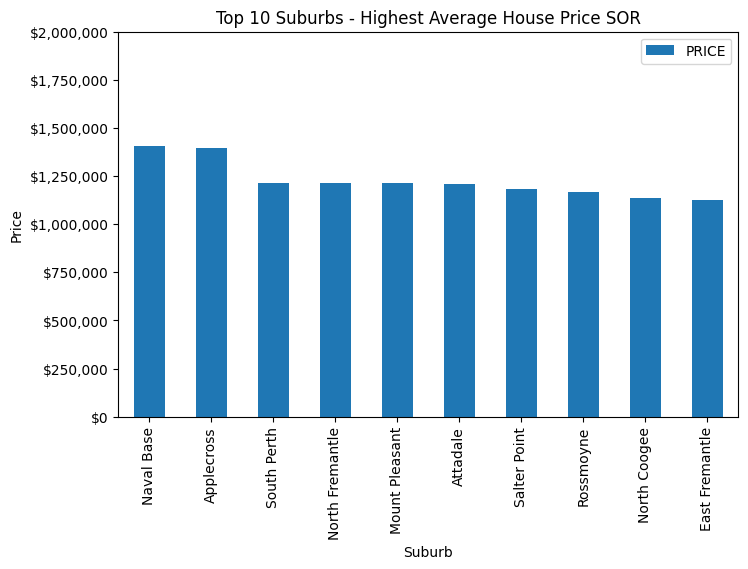

In [29]:
# Plot the top 10 suburbs average house SOR 
top_sor_plot = average_south_prices.head(10).plot(kind='bar', ylabel= "Price", ylim=(0,2000000), xlabel = "Suburb", figsize=(8,5), title= "Top 10 Suburbs - Highest Average House Price SOR")
top_sor_plot.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [30]:
# Analyse data from NOR. Average house prices NOR and sort into highest to lowest. 
average_north_prices= round(pd.DataFrame(north_data.groupby(['SUBURB'])['PRICE'].mean()),2)
average_north_prices = pd.DataFrame(average_north_prices['PRICE'].sort_values(ascending=False))

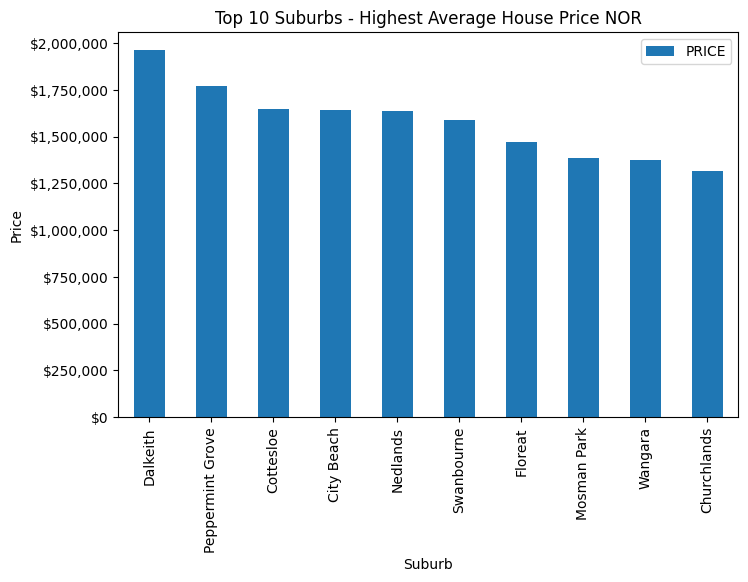

In [31]:
# Plot the Top 10 Suburbs house NOR
top_nor_plot = average_north_prices.head(10).plot(kind='bar', ylabel= "Price", xlabel = "Suburb", figsize=(8,5), title= "Top 10 Suburbs - Highest Average House Price NOR")
top_nor_plot.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

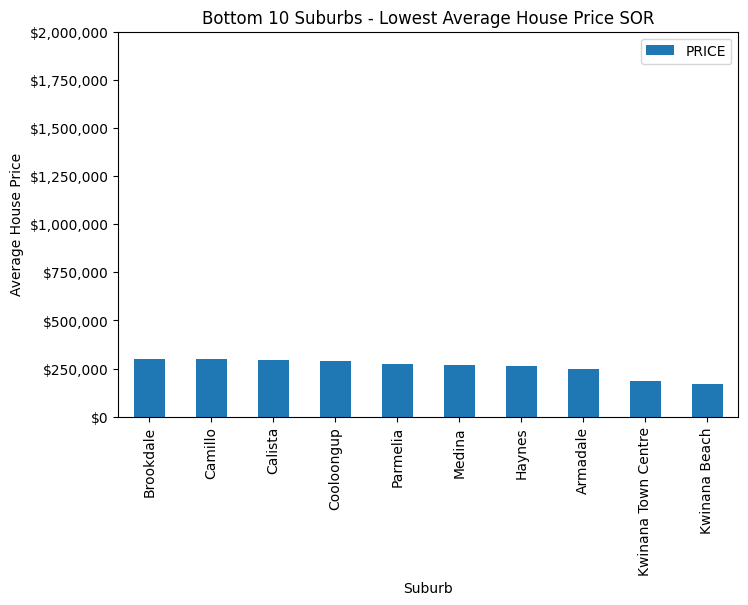

In [32]:
# Plot the Bottom 10 Suburbs house SOR 
bottom_sor_plot = average_south_prices.tail(10).plot(kind='bar', ylabel= "Average House Price", xlabel = "Suburb", ylim= (0,2000000), figsize=(8,5), title= "Bottom 10 Suburbs - Lowest Average House Price SOR")
bottom_sor_plot.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

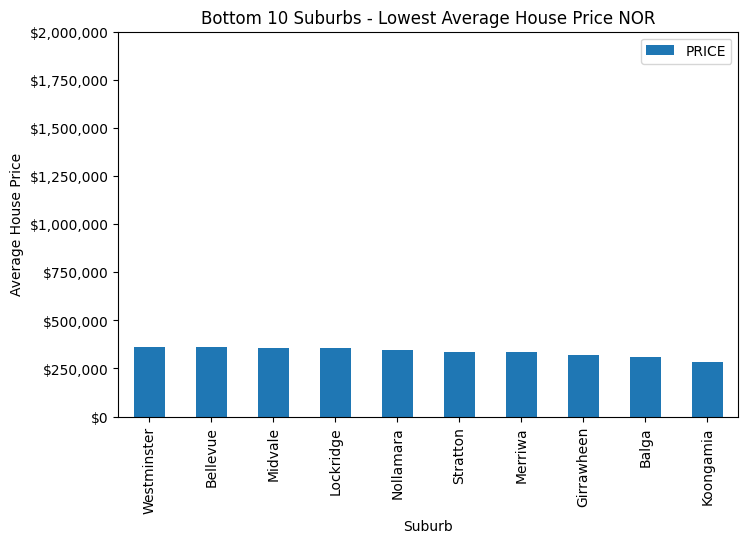

In [33]:
# Plot the Bottom 10 Suburbs house NOR 
bottom_nor_plot = average_north_prices.tail(10).plot(kind='bar', ylabel= "Average House Price", xlabel = "Suburb", ylim= (0,2000000), figsize=(8,5), title= "Bottom 10 Suburbs - Lowest Average House Price NOR")
bottom_nor_plot.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [34]:
# Extract the year only from the DATE_SOLD column. 
south_data['YEAR_SOLD'] = south_data['DATE_SOLD'].dt.year 
north_data['YEAR_SOLD'] = north_data['DATE_SOLD'].dt.year 

C:\Users\jesss\AppData\Local\Temp\ipykernel_9756\2166554490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_data['YEAR_SOLD'] = south_data['DATE_SOLD'].dt.year
C:\Users\jesss\AppData\Local\Temp\ipykernel_9756\2166554490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_data['YEAR_SOLD'] = north_data['DATE_SOLD'].dt.year


In [35]:
# Compare average house prices between NOR and SOR average over the years 
sor_average_price_by_year = south_data.groupby(['YEAR_SOLD'])['PRICE'].mean()
nor_average_price_by_year = north_data.groupby(['YEAR_SOLD'])['PRICE'].mean()

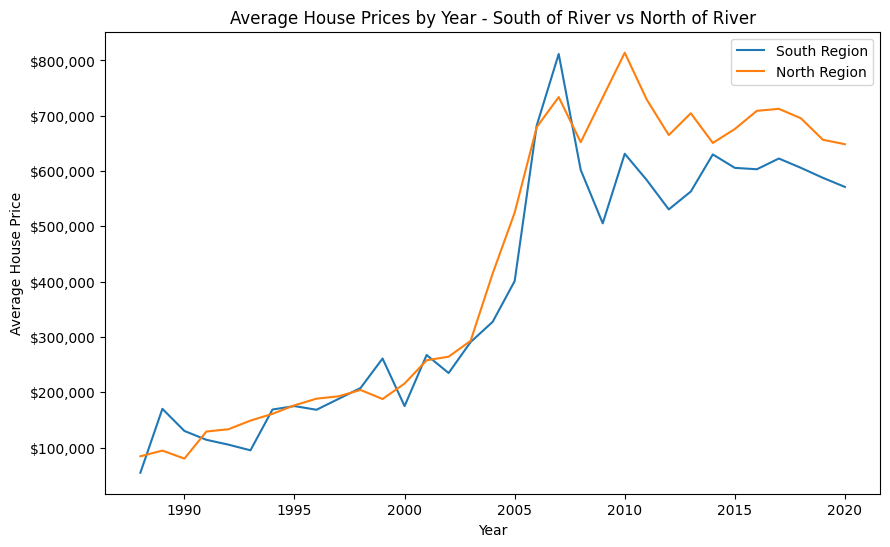

In [36]:
# Plotting the South region data as a line
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(sor_average_price_by_year.index, sor_average_price_by_year, label='South Region')

# Plotting the North region data as a line
ax1.plot(nor_average_price_by_year.index, nor_average_price_by_year, label='North Region')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Average House Price')
ax1.set_title('Average House Prices by Year - South of River vs North of River')
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Adding a legend
ax1.legend()

# Display the plot
plt.show()

In [37]:
# Create bins to determine a range of average prices and which suburb have the range of prices 
# Bins are 0, 300000, 500000, 800000, 1000000, 150000, 2000000, 2500000.   
bins = [0, 300000, 500000, 800000, 1000000, 1500000, 2000000]

# Create the names for the five bins
price_range = ["0 - $300k", "$300k - $500k", "$500k - $800k", "$800k - $1M", "$1m - $1.5m", "$1.5m - $2m"] 


In [38]:
# # Slice the data and place it into bins. Find sububrbs in NOR that are within certain price ranges.  
average_north_prices["PRICE_RANGE"] = pd.cut(average_north_prices['PRICE'], bins=bins , labels=price_range, include_lowest=True)
nor_price_ranges = average_north_prices.reset_index(level='SUBURB').set_index('PRICE_RANGE')
nor_price_ranges = nor_price_ranges.rename(columns={'PRICE': 'AVERAGE_PRICE'})
nor_price_ranges['AVERAGE_PRICE'] = nor_price_ranges['AVERAGE_PRICE'].map('${:,.0f}'.format)

In [39]:
# Find sububrbs in SOR that are within certain price ranges. 
average_south_prices["PRICE_RANGE"] = pd.cut(average_south_prices['PRICE'], bins=bins , labels=price_range, include_lowest=True)
sor_price_ranges = average_south_prices.reset_index(level='SUBURB').set_index('PRICE_RANGE')
sor_price_ranges = sor_price_ranges.rename(columns={'PRICE': 'AVERAGE_PRICE'})
sor_price_ranges['AVERAGE_PRICE'] = sor_price_ranges['AVERAGE_PRICE'].map('${:,.0f}'.format)

In [40]:
# Top 10 suburbs NOR- Top price range
nor_price_ranges.head()

SUBURB AVERAGE_PRICE
PRICE_RANGE                                
$1.5m - $2m          Dalkeith    $1,961,922
$1.5m - $2m  Peppermint Grove    $1,771,982
$1.5m - $2m         Cottesloe    $1,646,283
$1.5m - $2m        City Beach    $1,644,756
$1.5m - $2m          Nedlands    $1,639,099

In [41]:
# Top 10 suburbs - Top price range 
sor_price_ranges.head()

SUBURB AVERAGE_PRICE
PRICE_RANGE                               
$1m - $1.5m       Naval Base    $1,408,000
$1m - $1.5m       Applecross    $1,396,130
$1m - $1.5m      South Perth    $1,215,011
$1m - $1.5m  North Fremantle    $1,213,310
$1m - $1.5m   Mount Pleasant    $1,211,816

In [42]:
# Bottom 10 suburbs NOR- lowest price range
nor_price_ranges.tail()

SUBURB AVERAGE_PRICE
PRICE_RANGE                            
$300k - $500k    Stratton      $337,497
$300k - $500k     Merriwa      $333,589
$300k - $500k  Girrawheen      $318,077
$300k - $500k       Balga      $310,759
0 - $300k       Koongamia      $282,938

In [43]:
# Bottom 10 suburbs SOR - lower price range 
sor_price_ranges.tail()

SUBURB AVERAGE_PRICE
PRICE_RANGE                                   
0 - $300k                 Medina      $270,912
0 - $300k                 Haynes      $265,126
0 - $300k               Armadale      $249,044
0 - $300k    Kwinana Town Centre      $185,598
0 - $300k          Kwinana Beach      $170,000